# Practical Statistics for Data Scientists
## Chapter 2
Code snipets and figures of Chapter 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [3]:
loans_income = pd.read_csv( 'data/loans_income.csv')
sp500_px = pd.read_csv('data/sp500_data.csv')


In [4]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
samples = loans_income.values
print(bs.bootstrap(samples, stat_func=bs_stats.median, num_iterations=10000))

67000.0    (72000.0, 72986.5)


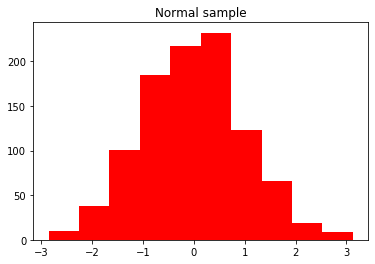

In [5]:
# Normal distribution
norm_samp = np.random.normal(size=1000)
plt.hist(norm_samp, color='red')
plt.title("Normal sample")
plt.show()

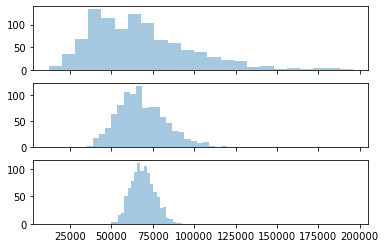

In [16]:
## resample mean
def sample_means(data, sample_size, B):
    sample = []
    for i in range(B):
        sample.append(data.sample(sample_size).mean())
    return sample

# take a simple random sample
samp_data = pd.DataFrame(loans_income.sample(1000))


samp_data_05 = pd.DataFrame(sample_means(loans_income, 5, 1000))


samp_data_20 = pd.DataFrame(sample_means(loans_income, 20, 1000))

_,(ax1,ax2,ax3)= plt.subplots(3, sharex = True)
sns.distplot(samp_data, kde=False, ax = ax1)
sns.distplot(samp_data_05, kde=False, ax = ax2)
sns.distplot(samp_data_20, kde=False, ax = ax3)
plt.show()

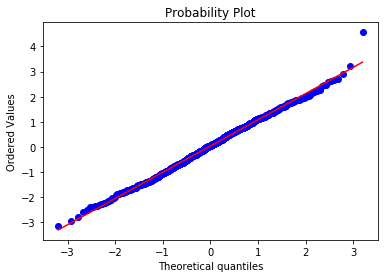

In [34]:
## QQ=Plot normal data

norm_samp = np.random.normal(size=1000)
stats.probplot(norm_samp, plot=plt)
plt.show()

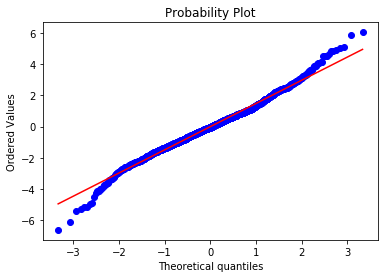

In [33]:
## QQ=Plot not normal data
nflx = sp500_px['NFLX']
nflx = np.diff(np.log(nflx[nflx>0]))
stats.probplot(nflx, plot=plt)
plt.show()

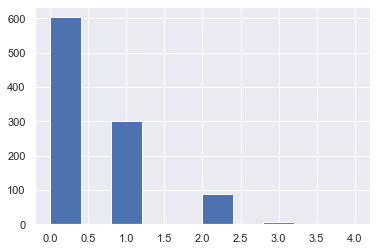

In [17]:
# Binomial distribution 
sns.set()
np.random.seed(0)
x = np.random.binomial(size = 1000, n = 5, p = 0.1)
#ax = sns.distplot(x, kde=False)
ax = plt.hist(x)

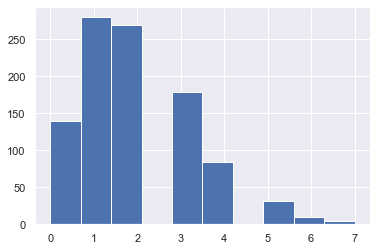

In [20]:
# Poisson distribution
x = np.random.poisson(lam = 2, size = 1000)
#ax = sns.distplot(x, kde=False)
ax = plt.hist(x)

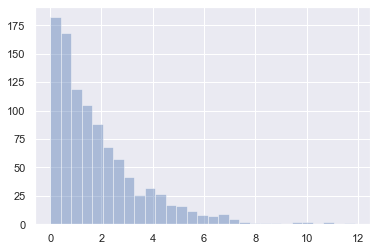

In [44]:
# Exponential distribution
x = np.random.exponential(scale = 2, size = 1000)
ax = sns.distplot(x, kde=False)

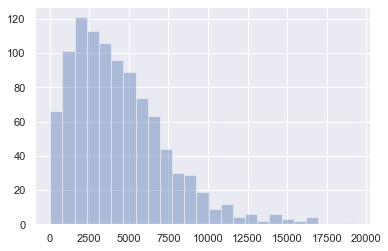

In [46]:
# Weibull distribution
x = stats.weibull_min.rvs(1.5, loc=0, scale=5000, size=1000)
ax = sns.distplot(x, kde=False)